아래 강의 노트는 [Python for data Analysis 책](https://github.com/wesm/pydata-book)4장을 기반으로 번역 및 편집하여 페이지 구성함  
<img src ="https://image.yes24.com/goods/73268296/800x0" width=5%>

 **무단 배포를 금지 합니다.** 

***

# 고급 배열 조작기법
## 1. 배열 재형성
```reshape``` 를 이용해 새로운 모양을 나태는 튜플을 넘기기

In [1]:
import numpy as np
arr = np.arange(8)
print(arr)
arr= arr.reshape((4, 2))
print(arr)

[0 1 2 3 4 5 6 7]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


다차원 배열 또한 재형성 가능

In [2]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

reshpae에 넘기는 값중 하나가 -1 가능    
원본 데이터를 참조하여 적절한 값으로 추론

In [3]:
arr = np.arange(15)#0~14
arr=arr.reshape((3, 5, -1)) # 3 x 5 x1
arr

array([[[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4]],

       [[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9]],

       [[10],
        [11],
        [12],
        [13],
        [14]]])

In [4]:
arr.reshape((3, -1))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

다차원 배열을 낮은 차원으로 **평탄화(flattening raveling)** 가능 

In [5]:
arr = np.arange(15).reshape((5, 3))
arr

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [6]:
arr = arr.ravel()
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [7]:
arr = np.arange(15).reshape((5, 3))
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 2.  배열 이어 붙이고 나누기

In [8]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]]) # 2X3
arr2 = np.array([[7, 8, 9], [10, 11, 12]])  #2x3

In [9]:
np.concatenate([arr1, arr2], axis=0) # 4 x 3

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [10]:
np.concatenate([arr1, arr2], axis=1) # 2 x 6

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [11]:
np.vstack((arr1, arr2)) #np.concatenate([arr1, arr2], axis=0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [12]:
np.hstack((arr1, arr2)) #np.concatenate([arr1, arr2], axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

```split``` 매서드를 사용하면 하나의 배열을 축을 따라 여러개의 배열로 나눌 수 있음
여기에서 [2,3]은 split되는 인덱스를 의미 

In [2]:
import numpy as np

In [3]:
arr = np.random.randn(5, 2)
print(arr)
first, second, third = np.split(arr, [1, 2])

[[-1.36445626  1.36636545]
 [-0.27903898  1.13883515]
 [ 1.79797219 -0.44815998]
 [ 1.42853957 -0.65986392]
 [-0.88109154  0.42092222]]


In [4]:
first

array([[-1.36445626,  1.36636545]])

In [15]:
second

array([[-0.19249557, -0.21311584]])

In [16]:
third

array([[ 1.83917072, -0.50240216],
       [-0.22958529, -0.16704125],
       [ 0.70771715,  0.09687626]])

## 3. 반복 엘리먼트

큰 배열을 만들기 위해 배열을 복사하거나 복제하는 함수로 ```repeat```와 ```tile```이 있다.    
```repeat```는 한 배열의 각 원소를 원하는 만큼 복제해서 큰 배열을 생성

In [1]:
arr = np.arange(3)  # 0 1 2 
print(arr)
arr.repeat(3) # 000 111 222 

[0 1 2]


array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [2]:
arr = np.random.randn(2, 2)
print(arr)
arr = arr.repeat(2, axis=0)
arr.repeat(2, axis=1)



[[ 1.11533109  0.55882597]
 [-0.05660742 -1.78747451]]


array([[ 1.11533109,  1.11533109,  0.55882597,  0.55882597],
       [ 1.11533109,  1.11533109,  0.55882597,  0.55882597],
       [-0.05660742, -0.05660742, -1.78747451, -1.78747451],
       [-0.05660742, -0.05660742, -1.78747451, -1.78747451]])

```tile```은  축을 따라 배열을 복사해서 쌓는 함수 <br>타일을 이어 붙이듯이 같은 내용의 배열을 이어 붙이기

In [4]:
import numpy as np
arr = np.random.randn(2, 2)
print(arr)
np.tile(arr, (2, 2))

[[0.04061595 0.13505418]
 [0.42147568 1.13623832]]


array([[0.04061595, 0.13505418, 0.04061595, 0.13505418],
       [0.42147568, 1.13623832, 0.42147568, 1.13623832],
       [0.04061595, 0.13505418, 0.04061595, 0.13505418],
       [0.42147568, 1.13623832, 0.42147568, 1.13623832]])

In [5]:
np.tile(arr,(2, 2))

array([[0.04061595, 0.13505418, 0.04061595, 0.13505418],
       [0.42147568, 1.13623832, 0.42147568, 1.13623832],
       [0.04061595, 0.13505418, 0.04061595, 0.13505418],
       [0.42147568, 1.13623832, 0.42147568, 1.13623832]])

## 4. 브로드캐스팅 <br>

다른 모양의 배열 간의 산술연산을 어떻게 수행 하는 지 설명   
**브로드 캐스팅 규칙:**   
이어지는 각 차원에 대해 축의 길이가 일치 하거나 둘중 하나가 길이가 1이라면 두 배열을 브로드캐스팅 호환이다.   
브로드캐트닝은 누락된 혹은 길이가 1인 차원에 대해 수행   
<img src="https://i.pinimg.com/736x/95/db/fa/95dbfa11a4f650c55823da7111f1c2ef.jpg" width=50%> 

In [5]:
arr1 = np.around(np.random.randn(4, 3)*10)
print(arr1)
arr2 =np.around(np.random.randn(3,)*10) 
print("arr2\n\n",arr2)
arr1 + arr2

[[ 5. -9.  5.]
 [11.  2.  3.]
 [ 4.  7.  1.]
 [ 8. -3. 11.]]
arr2

 [  5.  -7. -10.]


array([[ 10., -16.,  -5.],
       [ 16.,  -5.,  -7.],
       [  9.,   0.,  -9.],
       [ 13., -10.,   1.]])

아래 예제는 4x3행렬을 만들고 각 행에 대한 평균값을 뺀다고 가정 

In [3]:
arr1 = np.around(np.random.randn(4, 3)*10)
print(arr1)
row_mean = arr1.mean(1)
print(row_mean)
print(row_mean.shape)


[[ 25.   5.  -8.]
 [-11. -19.  -8.]
 [ -7. -13.   6.]
 [ -8. -14.  -6.]]
[  7.33333333 -12.66666667  -4.66666667  -9.33333333]
(4,)


<img src="https://i.pinimg.com/736x/95/db/fa/95dbfa11a4f650c55823da7111f1c2ef.jpg" width=50%>   
아래는 3차원 배열의 0번축에 대해 2차원 배열의 값을 더하는 과정
<img src="https://t1.daumcdn.net/cfile/tistory/992C603359DA68C815" width=50%>

다차원의 배열에서 브로드캐스팅은 규칙을 잘 따라야 계산 <br><br>
아래는 차원이 맞지 않을 경우에 대한 에러

In [4]:
dim_main_sub = arr1 - row_mean.reshape(4,1) #아래는 차원이 맞은 브로드캐스팅
dim_main_sub
dim_main_sub = arr1 - row_mean #아래는 차원이 맞지 않을 경우에 대한 에러

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [9]:
np.arange(3)+np.arange(3)

array([0, 2, 4])

## 5 .배열 데이터의 파일 입출력
* ```np.save(arr_name, arr)``` : arr_name으로 지정하여 배열 arr을 디스크에 저장
    * 압축되지 않은 원시 바이너리 형식의 .npy 파일로 저장됨
* ```np.load('arr_name.npy')``` : 배열을 불러옴
* ```np.savez('arr_name', a=arr, b=arr)``` : 여러 배열을 압축된 형식으로 저장
    + 저장하려는 배열을 키워드 인자 형태로 전달
    +각각의 배열을 필요할 때 불러올 수 있도록 사전 형식의 객체에 저장함

In [ ]:
# 배열 데이터의 파일 입출력
def fileIO_array():
    arr = np.arange(10)
    np.save("some_array", arr) # 바이너리 포맷 파일로 데이터 저장
    ld = np.load("some_array.npy") # load, save 메소드로 파일 입출력 처리 가능
    print(ld)
    
    # savez로 압축되지 않은 묶음 형식으로 다중 배열을 저장
    np.savez("array_archive.npz", a=arr, b=arr) # a와 b에 배열 저장
    arch = np.load("array_archive.npz") # 배열 데이터는 사전 형식의 객체로 불러옴
    print(arch['b']) # b에 저장한 배열 출력

## 6. 선형 대수 (Linear Algebra)

* 배열 기반 프로그래밍에서 선형 대수는 매우 중요 (행렬 곱셈, 분할, 행렬식, 정사각 행렬 수학 등의 선형대수
* 행렬의 곱셈은 * 가 아닌 ```np.dot()``` 함수를 사용하자
* 파이썬 v3.5 이후부터 행렬곱 연산자로 @ 사용 가능 ```print(x @ np.ones(3))```

In [7]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[6,23],[-1,7],[8,9]])

ret = x.dot(y) # x와 y의 행렬 곱  => ret = np.dot(x,y)와 동일
print(ret)

print(x @ np.ones(3))

[[ 28  64]
 [ 67 181]]
[ 6. 15.]


## 7. 난수 생성 (Random Number Generation)
* ```numpy.random``` 모듈은 파이썬 내장 random 함수를 보강하여, 다양한 종류의 확률분포로부터 효과적으로 표본값을 생성하는데 주로 사용됨
* 한 번에 하나의 값만 생성하는 파이썬 ```random``` 모듈과 다르게 ```numpy.random```은 매우 큰 크기의 표본을 생성하는데 빠르다
* ```normal()``` 을 사용해 표준정규분포로부터 4x4 크기의 표본을 생성해보자.

In [11]:
samples = np.random.normal(size=(4,4))
print(samples)

[[ 1.48018637 -1.47789221  1.01840079  0.11999494]
 [ 0.52227278 -0.32700703  0.15563268  1.4348711 ]
 [ 0.06319012 -0.15518642  0.08579881  1.07648217]
 [ 0.47172334  0.16681384 -0.77381811 -1.72136348]]


#### Random Points (계단 오르내리기 예제)

* 배열 연산의 활용을 보여주는 간단한 애플리케이션을 구현해보자.

* 계단 중간에서 같은 확률로 한 계단 올라가거나 내려간다.

* 순수 파이썬으로 내장 random 모듈을 사용한 경우

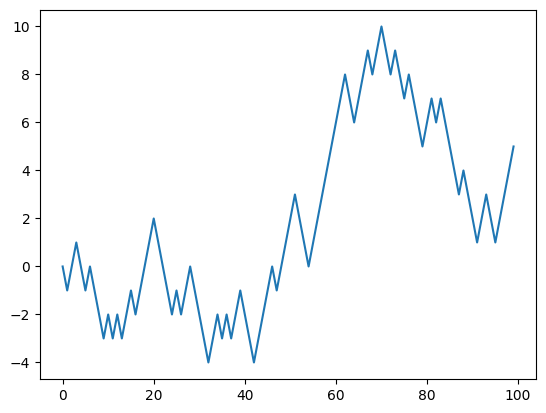

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

    
    
plt.plot(walk[:100])
plt.show()


np.random 모듈을 사용해 1000번 +1. -1 수행한 결과를 한번에 저장하고 누적합 계산하기

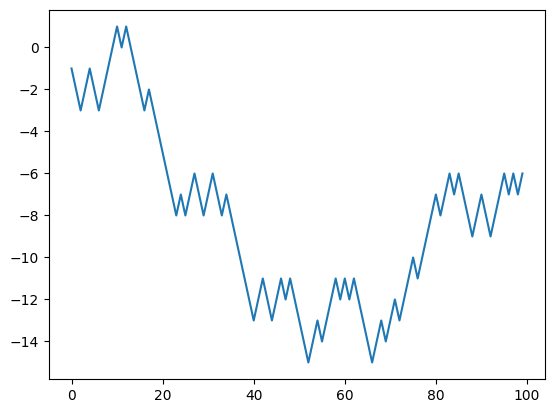

In [21]:
nsteps = 2000
# line 1: 
steps = np.random.randint(0, 2, size=nsteps)
# line 2
steps[steps==0] = -1
# line 3
walk = steps.cumsum()
plt.plot(walk[:100])
plt.show()
